In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import joblib
import PIL
%matplotlib inline
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

In [2]:
import os

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [4]:
pixel=[]
mask=[]

In [11]:
directory = 'data2/train/sand'

In [12]:
for im in os.listdir(directory):  
    img = Image.open(directory+'/{}'.format(im)).convert("RGB")
    pix = img.load()
    x,y=img.size
    for i in range (0,x,1):
        for j in range (0,y,1): 
            pixel.append(pix[i,j])
            mask.append(3)
    

In [13]:
# n=1
# [mask[i:i+n] for i in range(0, len(mask), n)]

In [14]:
clf = RandomForestClassifier(random_state=0)

In [15]:
clf.fit(pixel,mask)           


c:\users\adam\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
joblib.dump(clf, "model")

['model']

In [57]:
img = Image.open('Przechwytywanie.PNG').convert("RGB")
pix = img.load()
x,y=img.size
final_matrix = np.zeros( (x,y,3), dtype=np.uint8 )

In [58]:
# ZWEKTORYZUJŻE
for i in range (0,x,1):
    for j in range (0,y,1):
        if(clf.predict([pix[i,j]])==1):
            final_matrix[i,j]=color_to_paint=[4,86,22]
        else:
            final_matrix[i,j]=color_to_paint=[4,50,14]
#         licz=licz+1
            

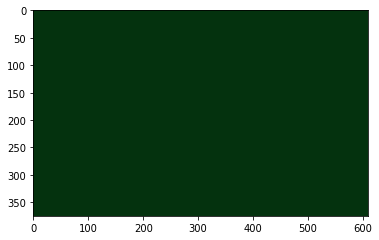

In [59]:
img = Image.fromarray( final_matrix )
img=img.rotate(-90, Image.NEAREST, expand = 1)
img= img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
plt.imshow(img)